# __Working with Text Data in Pandas__

## __Agenda__

- Text Data in Pandas
- Iteration
  * Iterating over Rows
  * Applying a Function to Each Element
  * Vectorized Operations
  * Iterating over Series
- Sorting
  * Sorting DataFrame by Column
  * Sorting DataFrame by Multiple Columns
  * Sorting DataFrame by Index
  * Sorting a Series
- Plotting with Pandas

### __1. Text Data in Pandas__

Working with text data in Pandas involves various operations to manipulate and analyze textual information. Here are some common text data operations using Pandas:

In [43]:
# Assuming 'df' is DataFrame with a 'Column' containing text data
import pandas as pd

df = pd.DataFrame({'Column': ['Hello', 'World', 'Python', 'Data Science']})

# Calculates the length of each string
df['Length'] = df['Column'].str.len()
print("Length of each string:")
print(df[['Column', 'Length']])


Length of each string:
         Column  Length
0         Hello       5
1         World       5
2        Python       6
3  Data Science      12


In [44]:
# Assuming 'df' is DataFrame with a 'Column' containing text data
df = pd.DataFrame({'Column': ['Hello', 'World', 'Python', 'Data Science']})

# Converts text to lowercase
df['Lowercase'] = df['Column'].str.lower()
print("\nText in lowercase:")
print(df[['Column', 'Lowercase']])



Text in lowercase:
         Column     Lowercase
0         Hello         hello
1         World         world
2        Python        python
3  Data Science  data science


In [104]:
# Assuming 'df' is DataFrame with a 'Column' containing text data
df = pd.DataFrame({'Column': ['Hello', 'World', 'Python', 'Data Science', 'data ']})

# Checks if each string contains the specified substring
substring = 'Data'
df['ContainsSubstring'] = df['Column'].str.contains(substring)
print("\nContains substring 'Data':")
print(df[['Column', 'ContainsSubstring']])



Contains substring 'Data':
         Column  ContainsSubstring
0         Hello              False
1         World              False
2        Python              False
3  Data Science               True
4         data               False


In [105]:
df[['Column', 'ContainsSubstring']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Column             5 non-null      object
 1   ContainsSubstring  5 non-null      bool  
dtypes: bool(1), object(1)
memory usage: 177.0+ bytes


## __2. Iteration__

Iteration in Pandas typically involves traversing through the rows or elements of a DataFrame or Series.
- However, it is important to note that direct iteration over DataFrame rows using Python's for loop is generally discouraged due to performance reasons.
- Instead, Pandas provides efficient methods for iteration and applying functions to DataFrame elements.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_04_Working_with_Pandas/4_Working_with_Text_Data_in_Pandas/Iteration.png)

### __2.1 Iterating over Rows__

In [46]:
import pandas as pd

# Assuming 'df' is your DataFrame with columns 'Column1' and 'Column2'
df = pd.DataFrame({'Column1': [1, 2, 3], 'Column2': ['A', 'B', 'C']})

for index, row in df.iterrows():
    print(f"Index: {index}, Data: {row['Column1']}, {row['Column2']}")


Index: 0, Data: 1, A
Index: 1, Data: 2, B
Index: 2, Data: 3, C


### __2.2 Applying a Function to Each Element__

In [106]:
# Assuming 'df' is your DataFrame with 'ExistingColumn'
df = pd.DataFrame({'ExistingColumn': [10, 20, 30]})

df['NewColumn'] = df['ExistingColumn'].apply(lambda x: x * 2)
print(df)


   ExistingColumn  NewColumn
0              10         20
1              20         40
2              30         60


In [107]:
# We can also "apply" a function on multiple columns at a time.
# Assuming 'df' is your DataFrame with 'ExistingColumn'
df = pd.DataFrame({'col1': [10, 20, 30], 'col2': [1,3,5]})

In [108]:
df

,col1,col2
0,10,1
1,20,3
2,30,5


In [110]:
df[['col1_doubled', 'col2_doubled']] = df[['col1', 'col2']].apply(lambda x: x*2)

In [111]:
df

,col1,col2,col1_doubled,col2_doubled
0,10,1,20,2
1,20,3,40,6
2,30,5,60,10


### __2.3 Vectorized Operations__

In [48]:
# Assuming 'df' is your DataFrame with 'ColumnA' and 'ColumnB'
df = pd.DataFrame({'ColumnA': [1, 2, 3], 'ColumnB': [4, 5, 6]})

df['ResultColumn'] = df['ColumnA'] + df['ColumnB']
print(df)

   ColumnA  ColumnB  ResultColumn
0        1        4             5
1        2        5             7
2        3        6             9


In [115]:
# What happens if one of the cols is NaN/None
import numpy as np
df = pd.DataFrame({'ColumnA': [1, 2, 3, 4], 'ColumnB': [4, 5, 6, None]})

df['ResultColumn'] = df['ColumnA'] + df['ColumnB']
print(df)

   ColumnA  ColumnB  ResultColumn
0        1      4.0           5.0
1        2      5.0           7.0
2        3      6.0           9.0
3        4      NaN           NaN


#### Pandas apply() has an axis argument
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html 

In [118]:
df = pd.DataFrame({'ColumnA': [1, 2, 3, 4], 'ColumnB': [4, 5, 6, None]})

In [121]:
df

,ColumnA,ColumnB
0,1,4.0
1,2,5.0
2,3,6.0
3,4,NaN


In [122]:
df.apply(lambda x: x*2, axis=1)

,ColumnA,ColumnB
0,2.0,8.0
1,4.0,10.0
2,6.0,12.0
3,8.0,NaN


### __2.4 Iterating over Series__

In [116]:
# Assuming 'series' is your Pandas Series
series = pd.Series([10, 20, 30], name='Values')

for index, value in series.items():
    print(f"Index: {index}, Value: {value}")

Index: 0, Value: 10
Index: 1, Value: 20
Index: 2, Value: 30


## __3. Sorting__
Sorting in Pandas involves arranging the elements of a DataFrame or Series based on specific criteria, such as column values or indices.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Updated_Images/Lesson_4/4_04/Sorting.png)

### __3.1 Sorting DataFrame by Column__

In [125]:
# Create a sample DataFrame
df = pd.DataFrame({'Name': ['Alice', 'Bob', 'Charlie'],
                   'Age': [25, 22, 30],
                   'Salary': [50000, 60000, 75000]})

# Sort DataFrame by the 'Age' column in ascending order
df_sorted = df.sort_values(by='Age')
print("Sorted DataFrame by Age:\n", df_sorted)

Sorted DataFrame by Age:
       Name  Age  Salary
1      Bob   22   60000
0    Alice   25   50000
2  Charlie   30   75000


In [127]:
# Sort DataFrame by the 'Age' column in descneding order
df_sorted = df.sort_values(by='Age', ascending=False)
print("Sorted DataFrame by Age:\n", df_sorted)

Sorted DataFrame by Age:
       Name  Age  Salary
2  Charlie   30   75000
0    Alice   25   50000
1      Bob   22   60000


### __3.2 Sorting DataFrame by Multiple Columns__

In [128]:
# Sort DataFrame by 'Age' in ascending order, then by 'Salary' in descending order
df_sorted_multi = df.sort_values(by=['Age', 'Salary'], ascending=[True, False]) # You can control each column independently.
print("\nSorted DataFrame by Age and Salary:\n", df_sorted_multi)



Sorted DataFrame by Age and Salary:
       Name  Age  Salary
1      Bob   22   60000
0    Alice   25   50000
2  Charlie   30   75000


#### Some additional details.

1. When you sort by multiple columns, pandas applies them left to right, just like SQL:

    df.sort_values(by=["A", "B", "C"]) means
    1. Sort by A
    2. If two rows tie on A, sort those by B
    3. If they also tie on B, sort by C

2. Pandas sorting is stable by default. That means:

   If two rows are equal on all sort keys, their original order is preserved

   This is useful when:
   - You want deterministic results
   - You sort multiple times

3. NaN values go last

4. If a column is Categorical, pandas uses category order, not lexicographic order.  Remember that cat.codes is used when ordered=False

In [129]:
df = pd.DataFrame({
    "Week": [1, 1, 2, 2, 1],
    "Temperature": [70, 60, 65, 80, 60],
    "Precipitation": [0.1, 0.2, 0.1, 0.3, 0.05]
})


In [130]:
df

,Week,Temperature,Precipitation
0,1,70,0.10
1,1,60,0.20
2,2,65,0.10
3,2,80,0.30
4,1,60,0.05


In [131]:
# Sort by Week, then Temperature
df.sort_values(by=["Week", "Temperature"])

,Week,Temperature,Precipitation
1,1,60,0.20
4,1,60,0.05
0,1,70,0.10
2,2,65,0.10
3,2,80,0.30


In [76]:
# Add a category column
def classify_temp(t):
    if t < 65:
        return "Low"
    elif t <= 70:
        return "Medium"
    else:
        return "High"

In [77]:
df["Temp_Category"] = df['Temperature'].apply(classify_temp)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Week           5 non-null      int64  
 1   Temperature    5 non-null      int64  
 2   Precipitation  5 non-null      float64
 3   Temp_Category  5 non-null      object 
dtypes: float64(1), int64(2), object(1)
memory usage: 292.0+ bytes


In [79]:
# Make the Temp_Category as categorical.
df["Temp_Category"] = pd.Categorical(
    df["Temp_Category"],
    categories=["Low", "Medium", "High"],
    ordered=True
)

df.sort_values(["Temp_Category", "Temperature"])

,Week,Temperature,Precipitation,Temp_Category
1,1,60,0.20,Low
4,1,60,0.05,Low
2,2,65,0.10,Medium
0,1,70,0.10,Medium
3,2,80,0.30,High


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Week           5 non-null      int64   
 1   Temperature    5 non-null      int64   
 2   Precipitation  5 non-null      float64 
 3   Temp_Category  5 non-null      category
dtypes: category(1), float64(1), int64(2)
memory usage: 389.0 bytes


In [81]:
df["Temp_Category"] = pd.Categorical(
    df["Temp_Category"],
    categories=["Low", "Medium", "High"],
    ordered=True
)

df.sort_values(by="Temp_Category")

,Week,Temperature,Precipitation,Temp_Category
1,1,60,0.20,Low
4,1,60,0.05,Low
0,1,70,0.10,Medium
2,2,65,0.10,Medium
3,2,80,0.30,High


In [139]:
# What happens if I fail to provide all the possible catgories
df = pd.DataFrame({
    "Week": [1, 1, 2, 2, 1],
    "Temperature": [70, 60, 65, 80, 60],
    "Precipitation": [0.1, 0.2, 0.1, 0.3, 0.05]
})

# Add a category column
def classify_temp(t):
    if t < 65:
        return "Low"
    elif t <= 70:
        return "Medium"
    else:
        return "High"
        
df["Temp_Category"] = df['Temperature'].apply(classify_temp)

df["Temp_Category"] = pd.Categorical(
    df["Temp_Category"],
    categories=["Low", "Medium"], # High is missing
    ordered=True
)

In [142]:
df

,Week,Temperature,Precipitation,Temp_Category
0,1,70,0.10,Medium
1,1,60,0.20,Low
2,2,65,0.10,Medium
3,2,80,0.30,NaN
4,1,60,0.05,Low


In [144]:
df.sort_values("Temp_Category", ascending=True) # No matter what ascending is set to, NaN is always pushed to the end

,Week,Temperature,Precipitation,Temp_Category
0,1,70,0.10,Medium
2,2,65,0.10,Medium
1,1,60,0.20,Low
4,1,60,0.05,Low
3,2,80,0.30,NaN


In [145]:
df = pd.DataFrame({
    "Temp_Category": ["Low", "High", "Medium", "Low"],
    "Temperature": [60, 85, 70, 55]
})

df["Temp_Category"] = pd.Categorical(
    df["Temp_Category"],
    categories=["Low", "High", "Medium"],
    ordered=False
)

df.sort_values("Temp_Category")

,Temp_Category,Temperature
0,Low,60
3,Low,55
1,High,85
2,Medium,70


### __3.3 Sorting DataFrame by Index__

In [147]:
# Create a sample DataFrame
df = pd.DataFrame({'Name': ['Alice', 'Bob', 'Charlie'],
                   'Age': [25, 22, 30],
                   'Salary': [50000, 60000, 75000]})

df = df.set_index('Name')
# Sort DataFrame by index in descending order
df_sorted_index = df.sort_index(ascending=False)
print("\nSorted DataFrame by Index:\n", df_sorted_index)



Sorted DataFrame by Index:
          Age  Salary
Name                
Charlie   30   75000
Bob       22   60000
Alice     25   50000


### __3.4 Sorting a Series__

In [148]:
# Create a sample Series
series = pd.Series([25, 22, 30], index=['Alice', 'Bob', 'Charlie'], name='Age')

# Sort Series in descending order
series_sorted = series.sort_values(ascending=False)
print("\nSorted Series by Age:\n", series_sorted)



Sorted Series by Age:
 Charlie    30
Alice      25
Bob        22
Name: Age, dtype: int64


## __4. Plotting with Pandas__
Plotting data is required to visualize the data in Python. Python uses the plot method in pandas to create plots; there are many types of plots available in pandas.

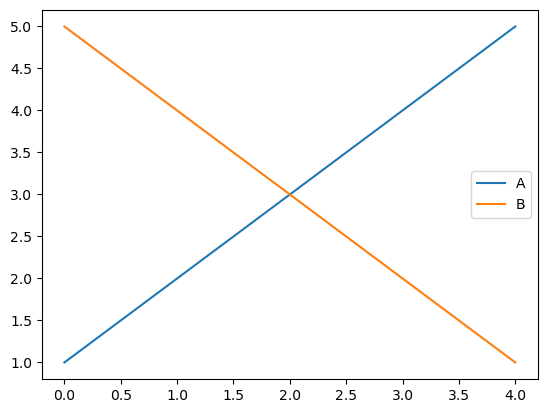

In [149]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample DataFrame
data = {'A': [1, 2, 3, 4, 5], 'B': [5, 4, 3, 2, 1]}
df = pd.DataFrame(data)

# Plot a line chart
df.plot()
plt.show()

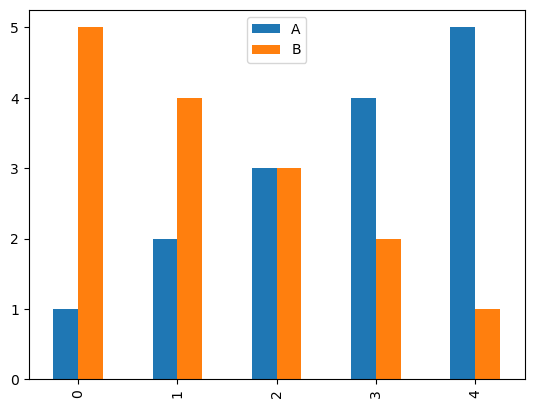

In [150]:
# Plot a bar chart
df.plot(kind='bar')
plt.show()


# __Assisted Practice__

## __Problem Statement:__
Create a detailed report on the monthly weather data by performing text manipulation, data sorting, and visualization to analyze temperature and precipitation trends.

__Data:__
The dataset contains daily observations of temperature and precipitation over a month.

## __Steps to Perform:__

1. Textual manipulation
- Convert 'Day' to a string format with appropriate suffixes (1st, 2nd, 3rd, and so on)
- Classify 'Temperature' into categories (Low, Medium, High) based on predefined thresholds
- Determine if 'Precipitation' falls under 'Light', 'Moderate', or 'Heavy' rainfall

2. Iteration and data aggregation
- Iterate over the DataFrame to calculate weekly averages of temperature and precipitation
- Summarize findings in a new DataFrame

3. Sorting
- Sort the DataFrame by 'Temperature' and 'Precipitation' in ascending and descending order
- Sort the DataFrame by the day of the month

4. Plotting
- Create a line plot for temperature trends
- Create a bar plot to compare precipitation levels across the month

In [151]:
df = pd.read_csv("Weather_data.csv")

In [152]:
df.head()

,Day,Temperature,Precipitation
0,1,23.232203,2.645556
1,2,25.727840,7.742337
2,3,24.041451,4.561503
3,4,23.173248,5.684339
4,5,21.354822,0.187898


In [84]:
def ordinal(n):
    return (
        f"{n}th" if 11 <= n % 100 <= 13
        else f"{n}{['th', 'st', 'nd', 'rd', 'th'][min(n % 10, 4)]}"
    )

In [153]:
df["Day_str"] = df["Day"].astype(int).apply(ordinal)

In [154]:
def classify_temp(t):
    if t < 16:
        return "Low"
    elif t <= 22:
        return "Medium"
    else:
        return "High"



In [155]:
df["Temp_Category"] = df["Temperature"].apply(classify_temp)

In [156]:
df.head()

,Day,Temperature,Precipitation,Day_str,Temp_Category
0,1,23.232203,2.645556,1st,High
1,2,25.727840,7.742337,2nd,High
2,3,24.041451,4.561503,3rd,High
3,4,23.173248,5.684339,4th,High
4,5,21.354822,0.187898,5th,Medium


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Day            30 non-null     int64  
 1   Temperature    30 non-null     float64
 2   Precipitation  30 non-null     float64
 3   Day_str        30 non-null     object 
 4   Temp_Category  30 non-null     object 
dtypes: float64(2), int64(1), object(2)
memory usage: 1.3+ KB


In [158]:
df["Temp_Category"] = pd.Categorical(
    df["Temp_Category"],
    categories=["Low", "Medium", "High"],
    ordered=True
)

In [160]:
df.head()

,Day,Temperature,Precipitation,Day_str,Temp_Category
0,1,23.232203,2.645556,1st,High
1,2,25.727840,7.742337,2nd,High
2,3,24.041451,4.561503,3rd,High
3,4,23.173248,5.684339,4th,High
4,5,21.354822,0.187898,5th,Medium


In [93]:
weekly = {}

for _, row in df.iterrows():
    week = (row["Day"] - 1) // 7 + 1 # We want week number to start at 1
    weekly[week] = {"temp_sum": 0, "precip_sum":0, "count":0}
    weekly[week]["temp_sum"] += row["Temperature"]
    weekly[week]["precip_sum"] += row["Precipitation"]
    weekly[week]["count"] += 1

weekly_df = pd.DataFrame([
    {
        "Week": week,
        "Avg_Temperature": vals["temp_sum"] / vals["count"],
        "Avg_Precipitation": vals["precip_sum"] / vals["count"]
    }
    for week, vals in sorted(weekly.items())
])

In [165]:
weekly.items()

dict_items([(1, {'temp_sum': 21.563808168940387, 'precip_sum': 6.120957227224214, 'count': 1}), (2, {'temp_sum': 28.88394957438992, 'precip_sum': 0.6022547162926983, 'count': 1}), (3, {'temp_sum': 29.67927513349146, 'precip_sum': 5.701967704178797, 'count': 1}), (4, {'temp_sum': 29.17003375574376, 'precip_sum': 2.532916025397821, 'count': 1}), (5, {'temp_sum': 21.21992909985785, 'precip_sum': 2.4442559200160274, 'count': 1})])

In [168]:
[
    {
        "Week": week,
        "Avg_Temperature": vals["temp_sum"] / vals["count"],
        "Avg_Precipitation": vals["precip_sum"] / vals["count"]
    }
    for week, vals in sorted(weekly.items())
]

[{'Week': 1,
  'Avg_Temperature': 21.563808168940387,
  'Avg_Precipitation': 6.120957227224214},
 {'Week': 2,
  'Avg_Temperature': 28.88394957438992,
  'Avg_Precipitation': 0.6022547162926983},
 {'Week': 3,
  'Avg_Temperature': 29.67927513349146,
  'Avg_Precipitation': 5.701967704178797},
 {'Week': 4,
  'Avg_Temperature': 29.17003375574376,
  'Avg_Precipitation': 2.532916025397821},
 {'Week': 5,
  'Avg_Temperature': 21.21992909985785,
  'Avg_Precipitation': 2.4442559200160274}]

In [161]:
weekly_df

,Week,Avg_Temperature,Avg_Precipitation
0,1,21.563808,6.120957
1,2,28.883950,0.602255
2,3,29.679275,5.701968
3,4,29.170034,2.532916
4,5,21.219929,2.444256


In [98]:
df.sort_values(by=["Temperature", "Precipitation"], ascending=[True, False])

,Day,Temperature,Precipitation,Day_str,Temp_Category
16,17,15.303276,2.103826,17th,Low
14,15,16.065541,6.667667,15th,Medium
15,16,16.306939,6.706379,16th,Medium
24,25,16.774116,2.088768,25th,Medium
26,27,17.150299,6.531083,27th,Medium
9,10,20.751623,6.818203,10th,Medium
29,30,21.219929,2.444256,30th,Medium
4,5,21.354822,0.187898,5th,Medium
6,7,21.563808,6.120957,7th,Medium
22,23,21.922190,9.883738,23rd,Medium


In [100]:
df = df.sort_values(by=["Day"], ascending=True)

<Axes: xlabel='Day'>

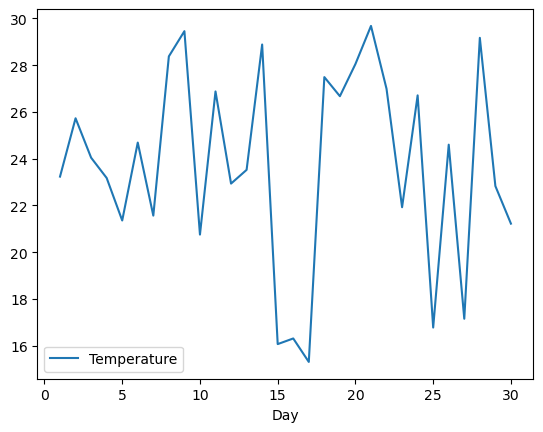

In [101]:
df.plot(x="Day", y="Temperature")

<Axes: xlabel='Day'>

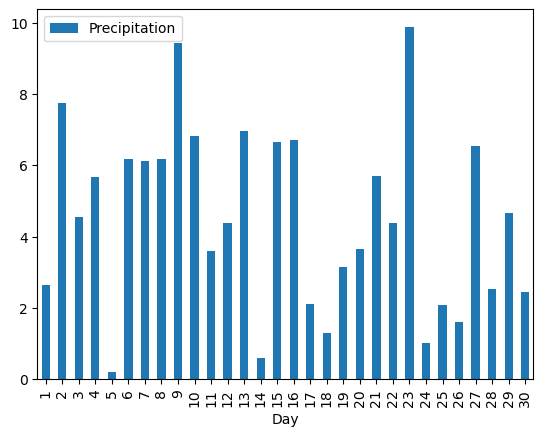

In [170]:
df.plot(x="Day", y="Precipitation", kind="bar")